In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing dataset

df = pd.read_csv('obesity_data.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
df.nunique()

Age                        62
Gender                      2
Height                   1000
Weight                   1000
BMI                      1000
PhysicalActivityLevel       4
ObesityCategory             4
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

# EDA

In [8]:
num_features = ['Age', 'Height', 'Weight', 'BMI']
cat_features = ['PhysicalActivityLevel', 'Gender', 'ObesityCategory']

## Numerical Feature Analysis

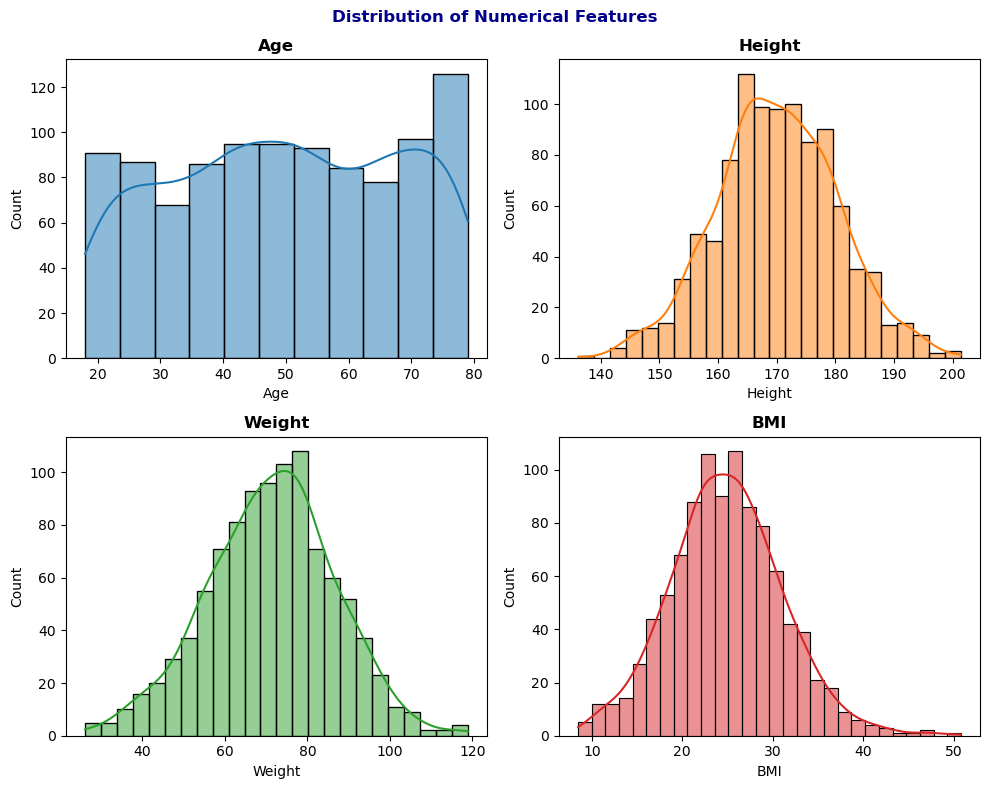

In [9]:
fig, axs = plt.subplots(nrows = 2, ncols =2, figsize = (10,8))
axs = axs.flat
colors = sns.color_palette(n_colors=len(num_features))

for i, num_feat in enumerate(num_features):
    sns.histplot(data = df, x = num_feat, kde=True, color = colors[i], ax = axs[i])
    axs[i].set_title(num_feat, fontweight = 'bold')

fig.suptitle('Distribution of Numerical Features', fontweight = 'bold', color = 'DarkBlue')
plt.tight_layout()
plt.show()

### Normality Test :

Hypothesis contrast to check our data, with a confidence level of 95%.

In [10]:
from scipy import stats

for num_feat in num_features:
    p_value = stats.shapiro(df[num_feat]).pvalue
    if p_value <= 0.05:
        print(f'* {num_feat} => NOT a normal distribution. P-value : {p_value}')
    else:
        print(f'* {num_feat} => a normal distribution. P-value : {p_value}')

* Age => NOT a normal distribution. P-value : 4.237507973510742e-17
* Height => a normal distribution. P-value : 0.7181615829467773
* Weight => a normal distribution. P-value : 0.2626090943813324
* BMI => NOT a normal distribution. P-value : 0.0009520018356852233


In [11]:
# Description of the data

df[num_features].describe()

,Age,Height,Weight,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317
std,18.114267,10.309971,15.509849,6.193912
min,18.000000,136.115719,26.065730,8.470572
25%,35.000000,163.514205,61.129629,20.918068
50%,50.000000,169.801665,71.929072,24.698647
75%,66.000000,177.353596,81.133746,28.732132
max,79.000000,201.419670,118.907366,50.791898


## Categorical Feature Analysis

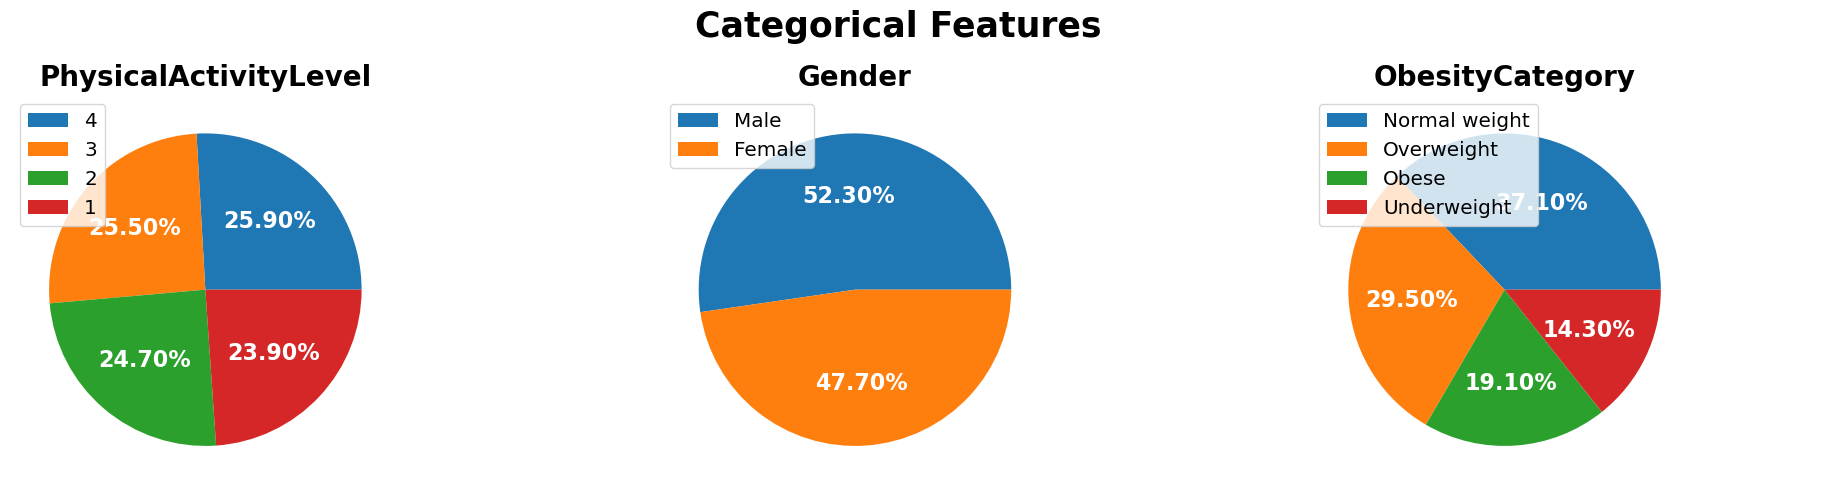

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

for i, cat_feat in enumerate(cat_features):
    value = df[cat_feat].value_counts()
    index = value.index
    axs[i].pie(x=value,labels= index, autopct = '%.2f%%', textprops={'color':'white','fontsize': 16, 'fontweight' : 'bold'})
    axs[i].set_title(cat_feat, fontweight = 'bold', fontsize = 20)
    axs[i].legend(index, fontsize='x-large', loc = 'upper left')
    #axs[i].axis('equal')
fig.suptitle('Categorical Features', fontweight = 'bold', fontsize = 25)
plt.tight_layout()
plt.show()

## Correlation Matrix for Numerical Features

In [13]:
corr_matrix = df[num_features].corr(method='spearman')

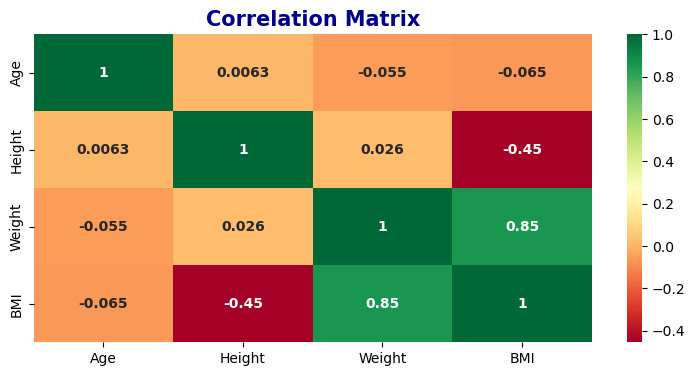

In [14]:
plt.subplots(figsize=(9,4))
sns.heatmap(corr_matrix, cmap = 'RdYlGn', annot=True, annot_kws = {'fontsize':10, 'fontweight':'bold'})
plt.title('Correlation Matrix', fontsize= 15, fontweight = 'bold', color = 'darkblue', loc = 'center')
plt.show()

Strong positive correlation between BMI and Weight.

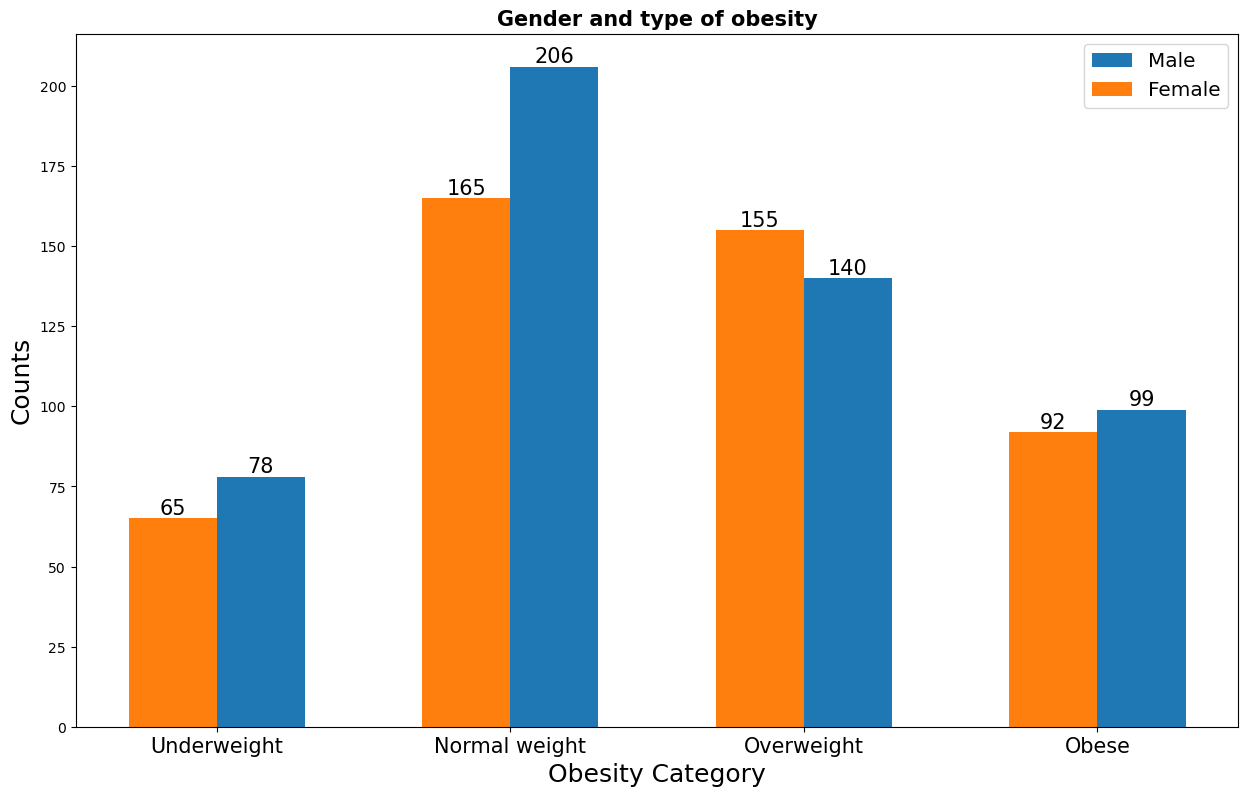

In [15]:
fig, ax = plt.subplots(figsize=(15,9))

category_order = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['ObesityCategory'] = pd.Categorical(df['ObesityCategory'], categories=category_order, ordered=True)

df_obesity_gender = pd.crosstab(df['ObesityCategory'], df['Gender'])

labels = df_obesity_gender.index
values_male = df_obesity_gender['Male']
values_female = df_obesity_gender['Female']

X_axis = np.arange(len(labels))
plt.bar(x = X_axis + 0.15, height = values_male, width = 0.3, label = 'Male')
plt.bar(x = X_axis - 0.15, height = values_female, width = 0.3, label = 'Female')

for container in ax.containers:
    ax.bar_label(container, size = 15)

ax.legend(fontsize = 'x-large')
ax.set_xticks(X_axis)
ax.set_xticklabels(labels, fontsize=15)
ax.set_title('Gender and type of obesity', fontsize = 15, fontweight = 'bold')
ax.set_xlabel('Obesity Category', fontsize =18)
ax.set_ylabel('Counts', fontsize =18)
plt.show()

# Data Preprocessing

In [16]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [18]:
X = df.drop('ObesityCategory', axis=1)
X.to_csv('Cleaned.csv')

In [19]:
y = df['ObesityCategory']

In [20]:
# Let's do the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [21]:
numerical_features = ['Age', 'Height', 'Weight', 'BMI']
categorical_features = ['Gender', 'PhysicalActivityLevel']

In [22]:
#OneHotEncoding and StandardScaling

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer

In [23]:
preprocessor = ColumnTransformer([
    ('Oh', OneHotEncoder(sparse_output = False, drop = 'first'), categorical_features),
    ('Scaler', StandardScaler(), numerical_features)
]).set_output(transform = 'pandas')

In [24]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [25]:
X_train_prep.head()

,Oh__Gender_Male,Oh__PhysicalActivityLevel_2,Oh__PhysicalActivityLevel_3,Oh__PhysicalActivityLevel_4,Scaler__Age,Scaler__Height,Scaler__Weight,Scaler__BMI
82,1.0,0.0,1.0,0.0,-1.034087,-0.885814,-0.504410,-0.062353
991,1.0,0.0,0.0,0.0,1.223344,0.108046,-1.110614,-1.041928
789,0.0,0.0,0.0,1.0,-0.263257,0.887536,0.137926,-0.334544
894,1.0,0.0,0.0,1.0,1.333463,-0.767769,0.806100,1.123261
398,1.0,0.0,0.0,1.0,0.837929,0.309495,0.345868,0.098299


In [26]:
X_test_prep.head()

,Oh__Gender_Male,Oh__PhysicalActivityLevel_2,Oh__PhysicalActivityLevel_3,Oh__PhysicalActivityLevel_4,Scaler__Age,Scaler__Height,Scaler__Weight,Scaler__BMI
521,1.0,1.0,0.0,0.0,-0.428435,2.534843,1.682652,0.052392
737,0.0,0.0,0.0,0.0,0.177218,-0.569457,0.282241,0.509779
740,0.0,0.0,0.0,0.0,1.553700,0.738894,0.955650,0.376583
660,0.0,0.0,0.0,1.0,-1.254324,-1.260776,-0.880598,-0.244705
411,0.0,0.0,0.0,0.0,1.553700,0.399188,0.492810,0.175348


# Model Selection

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Base Model : Linear Regressor

In [29]:
lr = LogisticRegression(random_state = 1234)
lr.fit(X_train_prep, y_train)

y_pred_train = lr.predict(X_train_prep)
y_pred_test = lr.predict(X_test_prep)

In [30]:
train_accuracy_score = balanced_accuracy_score(y_train, y_pred_train)
train_accuracy_score = round(train_accuracy_score, ndigits=3) * 100
print(f'Train accuracy score is : {train_accuracy_score}%')

test_accuracy_score = balanced_accuracy_score(y_test, y_pred_test)
test_accuracy_score = round(test_accuracy_score, ndigits=3) * 100
print(f'Test accuracy score is : {test_accuracy_score}%')

Train accuracy score is : 98.0%
Test accuracy score is : 95.5%


## Other Models :

In [33]:
models = {
    'Random Forest Classifier' : RandomForestClassifier(),
    'Extra Trees Classifier' : ExtraTreesClassifier(),
    'LGBM Classifier' : LGBMClassifier(verbose=0),
    'CatBoost Classifier' : CatBoostClassifier(verbose=0)
}

In [34]:
model_list = []
accuracy_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_prep, y_train)
    
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    
    train_accuracy_score = balanced_accuracy_score(y_train, y_pred_train)
    train_accuracy_score = round(train_accuracy_score, ndigits = 3) * 100
    test_accuracy_score = balanced_accuracy_score(y_test, y_pred_test)
    test_accuracy_score = round(test_accuracy_score, ndigits = 3) * 100
    
    print('*' * 35)
    print(list(models.keys())[i])
    print(f'Train accuracy score is :{train_accuracy_score}%')
    print(f'Test accuracy score is :{test_accuracy_score}%')
    print('*' * 35)
    print('\n')

***********************************
Random Forest Classifier
Train accuracy score is :100.0%
Test accuracy score is :100.0%
***********************************


***********************************
Extra Trees Classifier
Train accuracy score is :100.0%
Test accuracy score is :93.4%
***********************************


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

***********************************
CatBoost Classifier
Train accuracy score is :100.0%
Test accuracy score is :99.4%
***********************************




CatBoost Classifier performed the best, so I'm selecting CatBoost Classifier as the final model.

# Final Model

In [35]:
final_model = CatBoostClassifier(verbose = 0)
final_model.fit(X_train_prep, y_train)

y_train_prediction = final_model.predict(X_train_prep)
y_test_prediction = final_model.predict(X_test_prep)

In [36]:
# Classification Report
print('Train Classification Report')
print(classification_report(y_train, y_train_prediction))
print('\n')

print('Test Classification Report')
print(classification_report(y_test, y_test_prediction))
print('\n')

Train Classification Report
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00       280
        Obese       1.00      1.00      1.00       153
   Overweight       1.00      1.00      1.00       215
  Underweight       1.00      1.00      1.00       102

     accuracy                           1.00       750
    macro avg       1.00      1.00      1.00       750
 weighted avg       1.00      1.00      1.00       750



Test Classification Report
               precision    recall  f1-score   support

Normal weight       0.98      1.00      0.99        91
        Obese       1.00      1.00      1.00        38
   Overweight       1.00      0.97      0.99        80
  Underweight       1.00      1.00      1.00        41

     accuracy                           0.99       250
    macro avg       0.99      0.99      0.99       250
 weighted avg       0.99      0.99      0.99       250





# Confusion Matrix

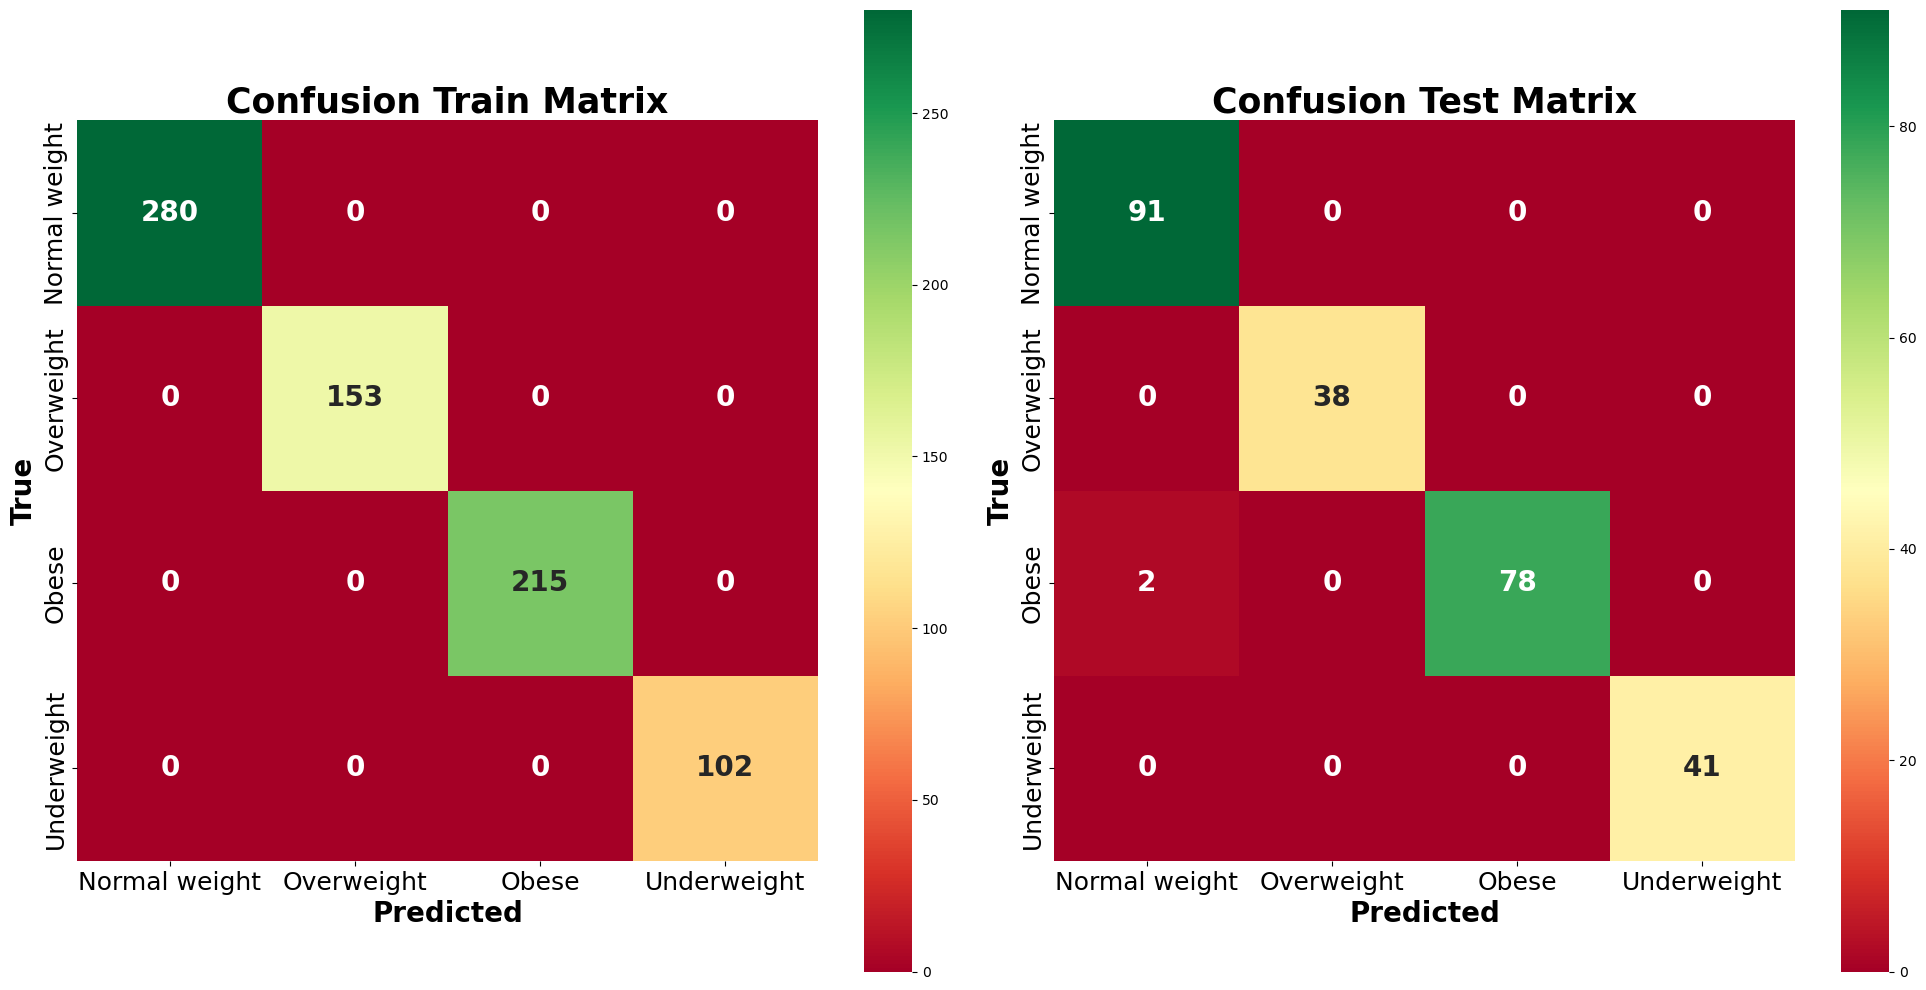

In [37]:
cnf_train = confusion_matrix(y_train, y_train_prediction)
cnf_test = confusion_matrix(y_test, y_test_prediction)
labels = y_train.value_counts().index

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.heatmap(cnf_train, fmt = 'd', ax=ax[0], annot=True, square = True, cmap = 'RdYlGn', annot_kws={'fontsize' : 20, 'fontweight' : 'bold'}, xticklabels = labels, yticklabels = labels)
sns.heatmap(cnf_test, fmt = 'd', ax=ax[1], annot=True, square = True, cmap = 'RdYlGn', annot_kws={'fontsize' : 20, 'fontweight' : 'bold'}, xticklabels = labels, yticklabels = labels)

ax[0].tick_params(labelsize = 18)
ax[1].tick_params(labelsize = 18)
ax[0].set_xlabel('Predicted', fontweight = 'bold', fontsize=20)
ax[0].set_ylabel('True', fontweight = 'bold', fontsize=20)
ax[1].set_xlabel('Predicted', fontweight = 'bold', fontsize=20)
ax[1].set_ylabel('True', fontweight = 'bold', fontsize=20)
ax[0].set_title('Confusion Train Matrix', fontweight = 'bold', fontsize = 25)
ax[1].set_title('Confusion Test Matrix', fontweight = 'bold', fontsize = 25)
plt.tight_layout()
plt.show()

# Feature Importance

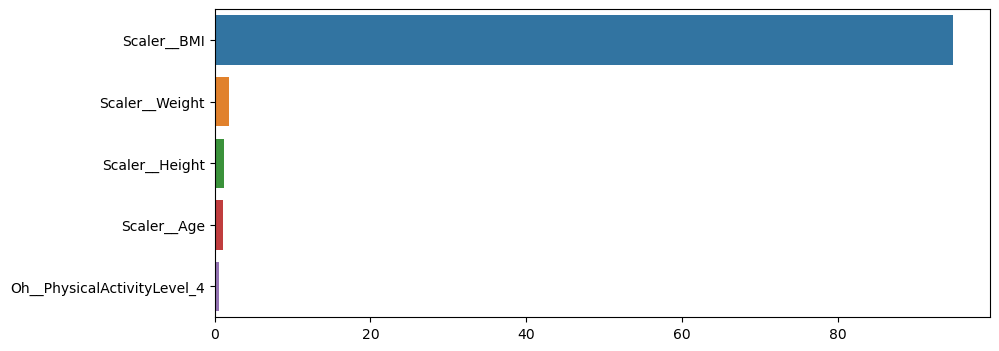

In [38]:
feature_importance = pd.Series(final_model.feature_importances_, index = X_train_prep.columns)
feature_importance = feature_importance.nlargest()
plt.figure(figsize = (10,4))
sns.barplot(x= feature_importance.values, y=feature_importance.index)
plt.show()

In [39]:
import pickle

file = open('Obesity_Model.pkl', 'wb')
pickle.dump(final_model, file)
file.close()